In [191]:
from pymatgen.ext.matproj import MPRester
from pymatgen.electronic_structure import bandstructure
from pymatgen.electronic_structure.plotter import BSPlotter
import numpy as np

with MPRester("nfHDloqMhx9N7jWGsB8") as m:

    # BandStructure for material id
    BandStruct = m.get_bandstructure_by_material_id("mp-762")
    
    # La bande interdite directe et indirecte
    Bdi = BandStruct.get_band_gap()
    Bdii = BandStruct.get_direct_band_gap()
    
    
    """la dispersions est la plus(resp. moins) importante lorsque la pentes de l'énergies en fonction du vecteur d'onde 
     est la plus forte(resp. la plus faible). Ainsi, en calculant les différences de distance (dx) et les différences
     d'énergies (dy) par rapport à cette distance on saura déterminer les pentes et donc les dispersions."""
        
    # récupération des données liés au graphe de la bande électronique
    Plot = BSPlotter(BandStruct)
    DatPlot = Plot.bs_plot_data()
    
    
    # calcul des différences de distances dx
    
    # On ne souhaite obtenir qu'une fois chaque label. 
    #print(DatPlot['ticks']['label']) #permet de repérer les labels redondants soit : 0,1,3,5,7,9,11,13,14,15
    Dist = DatPlot['ticks']['distance']
    dist = ([Dist[0],Dist[1],Dist[3],Dist[5],Dist[7],Dist[9],Dist[11],Dist[13],Dist[14],Dist[15]])
    Dx = np.zeros(9)
    for i in range(9):
        Dx[i]=dist[i+1]-dist[i]
            
    
    # calcul des différences d'énergies dy
    
    # On trouve le dict contenant toutes les informations sur l'énergie avec :
    Energ = DatPlot['energy'] 

    # Les données sur la bande minimum de conduction
    CBM = BandStruct.get_cbm()
    CInd = CBM['band_index']
    print(CInd) # On découvre avec ce print que l'indice de bande est 11
    DyC = np.zeros(9)
    for i in range(9):
        DyC[i] = Energ[i]['1'][11][-1]-Energ[i]['1'][11][0]

 
    # Les données sur la bande maximum de valence
    VBM = BandStruct.get_vbm()
    VInd = VBM['band_index']
    print(VInd) # On découvre avec ce print que l'indice de bande est 10
    DyV = np.zeros(9)
    for i in range(9):
        DyV[i] = Energ[i]['1'][10][-1]-Energ[i]['1'][10][0]
        

    # calcul des pentes maximales et minimales
    
    #CBM
    DispC = np.abs(DyC/Dx)
    print(DispC) # on repère ainsi la valeur maximale et minimale.
    #VBM
    DispV = np.abs(DyV/Dx)
    print(DispV) # on repère ainsi la valeur maximale et minimale
    
    
    # Calcul de la masse effective aux sommet et base
    
    #CBM
    # On trouve les coordonées de la base avec
    Base = DatPlot['cbm'] #1.5426 eV
    # On prends arbitrairement un autre point proche soit
    ParaBase = ([dist[4],Energ[4]['1'][11][0]]) # 3.0366 eV
    # On trouve une fonction parrabolique de l'énergie    
    # On trouve ensuite la masse effective en effectuant la dérivée seconde de l'energie par rapport au vecteur d'onde
    EpsC = 2*ParaBase[1]/(ParaBase[0]-Base[0][0])**2
    hBar = 1.054571818*10**(-34)
    MEffC = ((hBar**2)/EpsC)/((1.602*10**(-19))*(10**(-20)))
    
    #VBM
    # On trouve les coordonées du sommet avec
    Som = DatPlot['vbm'] 
    # On prends arbitrairement un autre point proche soit
    ParaSom = ([dist[2],Energ[2]['1'][10][0]]) 
    # On trouve une fonction parrabolique de l'énergie    
    # On trouve ensuite la masse effective en effectuant la dérivée seconde de l'energie par rapport au vecteur d'onde
    EpsV = 2*ParaSom[1]/(ParaSom[0]-Som[0][0])**2
    MEffV = ((hBar**2)/EpsV)/((1.602*10**(-19))*(10**(-20)))
    
        
    

defaultdict(<class 'list'>, {<Spin.up: 1>: [11]})
defaultdict(<class 'list'>, {<Spin.up: 1>: [10]})
[0.47006005 1.16492845 0.98954818 0.11381157 0.35854045 0.87399547
 0.74750288 0.33864911 0.67729822]
[1.38767885 1.45842546 0.47255242 0.24354084 0.87123454 0.58989994
 0.45956128 0.79767585 0.21329721]


Graphe de la structure de bande électronique


<module 'matplotlib.pyplot' from '/usr/local/lib64/python3.6/site-packages/matplotlib/pyplot.py'>

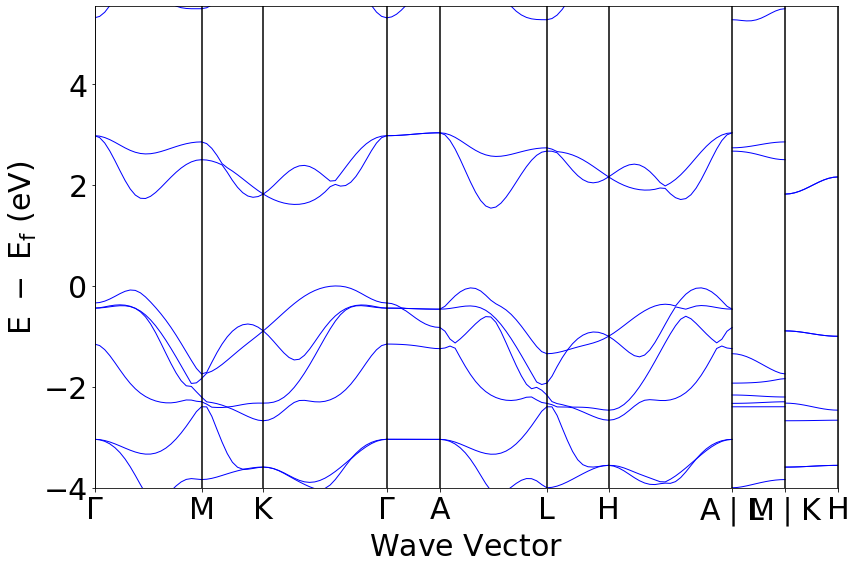

In [68]:
# Le graphe de la structure de bande en image :
print("Graphe de la structure de bande électronique")
Plot.get_plot()

In [20]:
print("La bande interdite se caractérise par :",Bdi)
print("La bande interdite est indirecte et la bande interdite directe est d'énergie",Bdii,"eV")

La bande interdite se caractérise par : {'direct': False, 'energy': 1.5425999999999997, 'transition': '(0.139,0.139,0.000)-(0.238,0.000,0.500)'}
La bande interdite est indirecte et la bande interdite directe est d'énergie 1.7698000000000005 eV


In [158]:
print("La première bande de conduction(CBM) présente le plus de dispersion dans la direction allant de",DatPlot['ticks']['label'][1],"à",DatPlot['ticks']['label'][3])
print("l'intensitée de la dispersion maximale vaut",DispC[1])
print("La dispersion est minimale dans la direction allant de",DatPlot['ticks']['label'][5],"(\u0393) à",DatPlot['ticks']['label'][7])
print("l'intensitée de la dispersion minimale vaut",DispC[3])

La première bande de conduction(CBM) présente le plus de dispersion dans la direction allant de M à K
l'intensitée de la dispersion maximale vaut 1.1649284483436217
La dispersion est minimale dans la direction allant de $\Gamma$ (Γ) à A
l'intensitée de la dispersion minimale vaut 0.11381157006190641


In [165]:
print("La dernière bande de valance(VBM) présente le plus de dispersion dans la direction allant de",DatPlot['ticks']['label'][1],"à",DatPlot['ticks']['label'][3])
print("l'intensitée de la dispersion maximale vaut",DispV[1])
print("La dispersion est minimale dans la direction allant de",DatPlot['ticks']['label'][14],"(M|K) à",DatPlot['ticks']['label'][15])
print("l'intensitée de la dispersion minimale vaut",DispV[8])

La dernière bande de valance(VBM) présente le plus de dispersion dans la direction allant de M à K
l'intensitée de la dispersion maximale vaut 1.4584254616680514
La dispersion est minimale dans la direction allant de M$\mid$K (M|K) à H
l'intensitée de la dispersion minimale vaut 0.21329720822790543


In [190]:
print("En supposant une dispersion parrabolique,\nla masse effective à la base de la première bande de conduction vaut",MEffC,"kg.")
print("Au sommet de la dernière bande de valance, la masse effective vaut",MEffV,"kg.")

En supposant une dispersion parrabolique,
la masse effective à la base de la première bande de conduction vaut 2.661264997060653e-31 kg.
Au sommet de la dernière bande de valance, la masse effective vaut -1.81512436365141e-30 kg.
